# Predicting top 100 Rumours

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# import statsmodels.discrete.discrete_model as sm
# from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder


encoder = OneHotEncoder(sparse = False, categories='auto')

In [309]:
# Setting the option to view all columns and rows of dataframe 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [310]:
# loading the data
df = pd.read_csv("D:/ACCRETE AI/Data.csv")

In [42]:
df.shape
# there are 3833 data points with 32 columns

(3833, 32)

In [43]:
#checking the first 5 data points
df.head()

,Unnamed: 0,RumorDate,CREDIBILITY,RELIABILITY,MARKETCAP,LASTTRADE,WEEKHIGH52,WEEKLOW52,CASH,EPS,PE,GROSSMARGINS,NETMARGINS,AVERAGEVOLUME,diff_target_SP500_price_move_10,diff_target_SP500_price_move_5,diff_target_SP500_price_move_3,target_price_move_3,target_price_move_5,target_price_move_10,"[-2,-1]","[-1,0]","[0,1]","[1,2]","[2,3]","[3,4]","[4,5]","[5,6]","[6,7]","[7,8]","[8,9]","[9,10]"
0,0,2015-06-19,0.013018,0.462733,0.001867,0.201995,0.017584,0.060214,0.006359,0.200737,0.004010,0.680209,0.503122,0.002178,0.077214,0.053385,0.081181,0.045869,0.130494,0.064716,0.0,0.0,0.073975,0.179787,0.255696,0.286535,0.204008,0.0,0.0,0.0,0.0,0.0
1,1,2016-10-25,0.538462,0.919803,0.000436,0.062158,0.032223,0.301147,0.015291,0.200244,0.003134,0.680789,0.101977,0.005157,0.069663,0.049451,0.078987,0.074047,0.149642,0.092743,0.0,0.0,0.073975,0.179787,0.255696,0.286535,0.204008,0.0,0.0,0.0,0.0,0.0
2,3,2017-03-15,0.082840,0.369076,0.000082,0.152185,0.000550,0.098768,0.003331,0.200207,0.001419,0.709808,0.000000,0.037541,0.064154,0.049378,0.116446,0.054687,0.198343,0.071735,0.0,0.0,0.108487,0.329580,0.306509,0.185846,0.069578,0.0,0.0,0.0,0.0,0.0
3,4,2017-03-29,0.050888,0.418429,0.003343,0.001070,0.005482,0.084741,0.007570,0.199467,0.001077,0.883343,0.477627,0.007154,0.059565,0.050884,0.099317,0.055722,0.169472,0.086256,0.0,0.0,0.108487,0.329580,0.306509,0.185846,0.069578,0.0,0.0,0.0,0.0,0.0
4,8,2017-04-12,0.195266,0.134653,0.013390,0.061776,0.051369,0.003290,0.015291,0.197011,0.002795,0.544399,0.543184,0.007078,0.059702,0.050239,0.085708,0.046439,0.188183,0.152484,0.0,0.0,0.109489,0.266100,0.366627,0.187564,0.070221,0.0,0.0,0.0,0.0,0.0


In [44]:
# checking if there are any missing values in the data
df.isnull().sum()
# There are no missing values 

Unnamed: 0                         0
RumorDate                          0
CREDIBILITY                        0
RELIABILITY                        0
MARKETCAP                          0
LASTTRADE                          0
WEEKHIGH52                         0
WEEKLOW52                          0
CASH                               0
EPS                                0
PE                                 0
GROSSMARGINS                       0
NETMARGINS                         0
AVERAGEVOLUME                      0
diff_target_SP500_price_move_10    0
diff_target_SP500_price_move_5     0
diff_target_SP500_price_move_3     0
target_price_move_3                0
target_price_move_5                0
target_price_move_10               0
[-2,-1]                            0
[-1,0]                             0
[0,1]                              0
[1,2]                              0
[2,3]                              0
[3,4]                              0
[4,5]                              0
[

In [45]:
# checking the number of unique values of each column
df.nunique(axis=0, dropna=True)
# columns [6,7] to [9,10] are redundant as they have just 1 value for each datapoint

Unnamed: 0                         3833
RumorDate                           340
CREDIBILITY                          96
RELIABILITY                        1156
MARKETCAP                           785
LASTTRADE                           741
WEEKHIGH52                          757
WEEKLOW52                           720
CASH                                119
EPS                                 543
PE                                  417
GROSSMARGINS                        445
NETMARGINS                          389
AVERAGEVOLUME                       723
diff_target_SP500_price_move_10    1964
diff_target_SP500_price_move_5     1936
diff_target_SP500_price_move_3     1952
target_price_move_3                1898
target_price_move_5                1941
target_price_move_10               1925
[-2,-1]                               2
[-1,0]                                4
[0,1]                                10
[1,2]                                10
[2,3]                                10


In [311]:
# Dropping the redundant columns
df.drop(['[6,7]', '[7,8]','[8,9]','[9,10]'], axis=1,inplace=True,errors = 'ignore')

In [48]:
# Trying to find strong correlation among predictors 
correlation =df.corr()
correlation
# there is not that much significant correlation among the variables 

,Unnamed: 0,CREDIBILITY,RELIABILITY,MARKETCAP,LASTTRADE,WEEKHIGH52,WEEKLOW52,CASH,EPS,PE,GROSSMARGINS,NETMARGINS,AVERAGEVOLUME,diff_target_SP500_price_move_10,diff_target_SP500_price_move_5,diff_target_SP500_price_move_3,target_price_move_3,target_price_move_5,target_price_move_10,"[-2,-1]","[-1,0]","[0,1]","[1,2]","[2,3]","[3,4]","[4,5]","[5,6]"
Unnamed: 0,1.000000,-0.015728,-0.000301,0.001352,-0.010209,-0.003331,-0.022049,0.026174,0.012345,-0.014587,0.031490,0.004459,-0.006994,-0.005001,-0.025372,0.002082,0.006538,-0.004888,-0.029296,-0.044158,-0.099916,0.093030,0.052587,0.066203,-0.039481,-0.127775,0.023916
CREDIBILITY,-0.015728,1.000000,-0.013433,0.031100,-0.011580,0.011016,-0.007362,0.013043,0.016124,-0.005832,-0.041235,-0.001792,-0.012109,-0.005156,-0.020252,-0.020562,-0.014642,-0.043490,0.015324,-0.018824,0.015063,0.016830,-0.009953,-0.016685,0.001413,0.013555,0.007690
RELIABILITY,-0.000301,-0.013433,1.000000,-0.018050,0.009898,0.009410,0.005310,-0.018721,0.018333,0.006358,0.025248,-0.012330,0.008485,-0.002219,-0.013389,0.001766,-0.008775,-0.003250,-0.049869,-0.027431,-0.009314,0.005689,-0.021085,0.007447,0.012775,0.003026,0.007163
MARKETCAP,0.001352,0.031100,-0.018050,1.000000,-0.039108,-0.011845,-0.022829,-0.017985,-0.015379,-0.006393,-0.011386,0.013462,0.000195,-0.007787,-0.017883,0.008525,0.010251,0.016534,0.031321,-0.003819,0.016343,-0.000453,-0.017644,-0.039694,0.023400,0.031486,0.003708
LASTTRADE,-0.010209,-0.011580,0.009898,-0.039108,1.000000,-0.025027,0.013555,-0.010644,0.034577,-0.003501,-0.011200,0.015428,-0.011801,-0.014834,0.021319,0.000722,-0.010626,-0.011088,-0.000746,-0.006614,0.045937,0.019626,0.003577,-0.022868,-0.009714,0.002201,0.016942
WEEKHIGH52,-0.003331,0.011016,0.009410,-0.011845,-0.025027,1.000000,0.002435,0.012867,-0.002013,-0.004997,0.008580,0.003455,0.055869,0.016878,-0.001540,-0.011091,-0.001725,0.008073,-0.012338,-0.003042,-0.004160,-0.007924,-0.004676,0.011377,0.007213,-0.006225,-0.014326
WEEKLOW52,-0.022049,-0.007362,0.005310,-0.022829,0.013555,0.002435,1.000000,0.000743,-0.030133,0.003850,0.001668,-0.000913,0.025814,-0.005524,-0.008055,-0.014252,0.026538,0.004569,-0.004099,0.022499,0.017996,-0.013626,-0.006440,-0.028917,0.013588,0.027317,-0.010548
CASH,0.026174,0.013043,-0.018721,-0.017985,-0.010644,0.012867,0.000743,1.000000,-0.009309,-0.008430,-0.001419,0.007741,0.004901,0.017204,-0.003147,-0.016373,-0.007453,-0.008741,-0.005046,0.001044,-0.007188,0.040043,-0.001610,-0.005434,-0.008285,-0.003642,-0.006783
EPS,0.012345,0.016124,0.018333,-0.015379,0.034577,-0.002013,-0.030133,-0.009309,1.000000,-0.005495,-0.000995,0.000281,0.000425,-0.014148,-0.003763,0.000690,-0.004448,0.003252,-0.007460,-0.001386,-0.004566,0.015573,-0.011197,0.004040,0.004633,-0.003315,-0.002125
PE,-0.014587,-0.005832,0.006358,-0.006393,-0.003501,-0.004997,0.003850,-0.008430,-0.005495,1.000000,0.010402,-0.007293,-0.009482,-0.001607,-0.011272,-0.005407,0.018852,-0.001361,0.000055,-0.001612,-0.001097,-0.003761,-0.005185,0.014542,0.000604,-0.005686,-0.004514


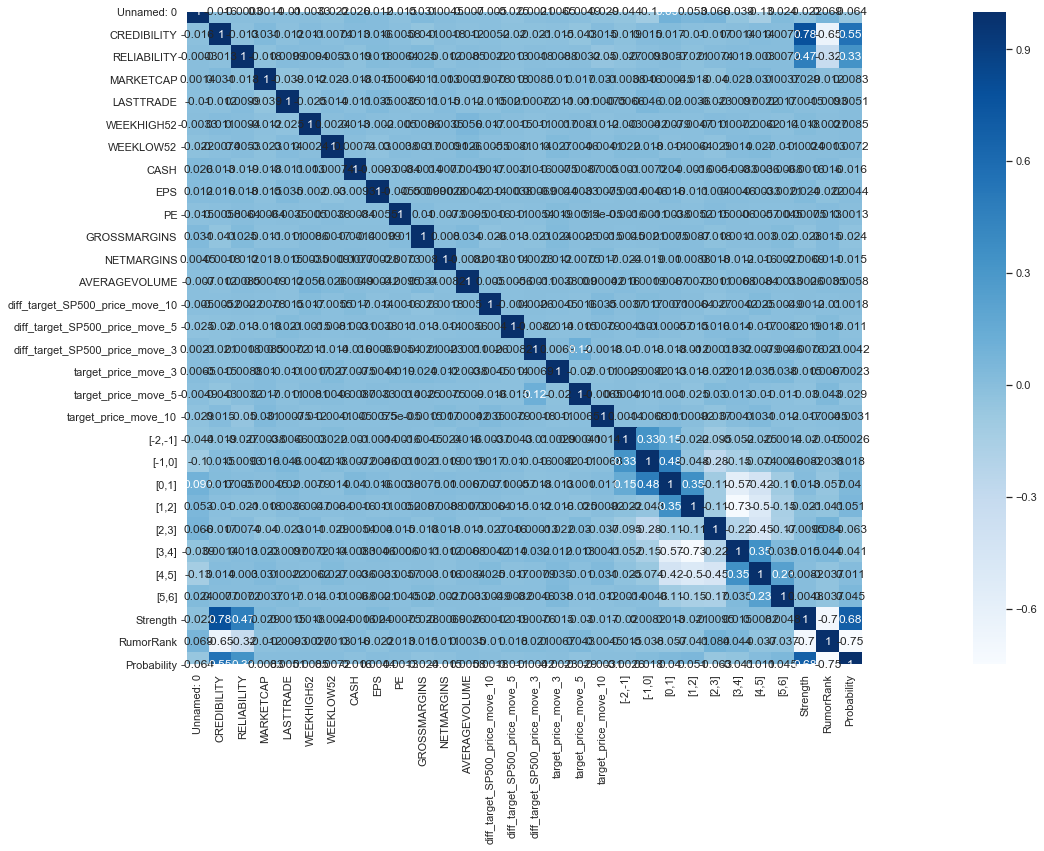

In [57]:
# trying to visualize using a correlation heatmap which helps in easy detection of high correlation due to colour
correlation =df.corr()
fig = plt.subplots(figsize=(40,12))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')


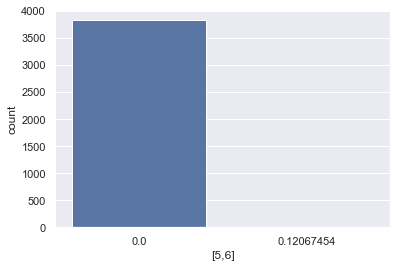

In [49]:
sns.set(style="darkgrid")
sns.countplot(x="[5,6]", data=df)
# this looks like there is a high number of 0.0 compared to 0.12067454
# thus data for this is not equally distributed

In [50]:
df[(df['[5,6]']==0.12067454)].shape
# there are just 10 set of data points with this value out of 3833

(10, 28)

(3, 28)

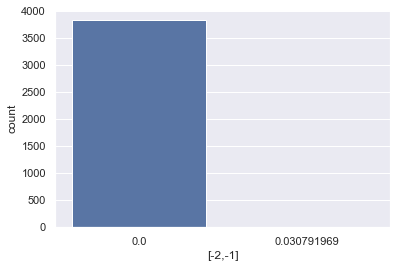

In [51]:
sns.set(style="darkgrid")
sns.countplot(x="[-2,-1]", data=df)
df[(df['[-2,-1]']==0.030791969)].shape

# there are just 3 values of 0.030791969

In [312]:

"""
1)From the data it is clear that we have to group the reliability and credibility '(2 properties of source)' for each month 
  somehow on whose basis we can rank the rumour and get the top 100 for each month

2)Multiplying CREDIBILITY and RELIABILITY seems to be a candidate metric to sepearate out 

3)However we can try another metric of ranking the rumors of each month based on RELIABILITY and CREDIBILITY seperately as well

4)In the end we can choose the one which will give the best accuracy in prediction

"""

# We are deleting the last 3 elements of the string objects of RumorDate column i.e just the day of that particular month
# Since we are interested in predicting the top 100 rumors of each month the information about the day of that month is
# redundant.

df['RumorDate'] = df.apply(lambda row:row["RumorDate"][0:-3], axis = 1)

df1,df2,df3 = df,df,df # storing the raw dataframe in 3 different variable 

# Using df1 to classify based on RELIABILITY * CREDIBILITY
# Adding another column 'Strength' to store the value of the product of RELIABILITY and CREDIBILITY in df1

df1['Strength'] = df1.apply(lambda row: row['CREDIBILITY'] * row['RELIABILITY'], axis = 1)

# Strength is a Feature Engineered column which is found to give better accuracy in prediction

# Using df1 to classify based on Strength,df2 to classify based on RELIABILITY and 
#df3 based on CREDIBILITY and ranking rumors by month

df2['RumorRank'] = df.groupby('RumorDate')['RELIABILITY'].rank(method = 'first',ascending = False)
df3['RumorRank'] = df.groupby('RumorDate')['CREDIBILITY'].rank(method = 'first',ascending = False)
df1["RumorRank"] = df.groupby('RumorDate')['Strength'].rank(method = 'first',ascending = False)

df2.head()

,Unnamed: 0,RumorDate,CREDIBILITY,RELIABILITY,MARKETCAP,LASTTRADE,WEEKHIGH52,WEEKLOW52,CASH,EPS,PE,GROSSMARGINS,NETMARGINS,AVERAGEVOLUME,diff_target_SP500_price_move_10,diff_target_SP500_price_move_5,diff_target_SP500_price_move_3,target_price_move_3,target_price_move_5,target_price_move_10,"[-2,-1]","[-1,0]","[0,1]","[1,2]","[2,3]","[3,4]","[4,5]","[5,6]",Strength,RumorRank
0,0,2015-06,0.013018,0.462733,0.001867,0.201995,0.017584,0.060214,0.006359,0.200737,0.004010,0.680209,0.503122,0.002178,0.077214,0.053385,0.081181,0.045869,0.130494,0.064716,0.0,0.0,0.073975,0.179787,0.255696,0.286535,0.204008,0.0,0.006024,1.0
1,1,2016-10,0.538462,0.919803,0.000436,0.062158,0.032223,0.301147,0.015291,0.200244,0.003134,0.680789,0.101977,0.005157,0.069663,0.049451,0.078987,0.074047,0.149642,0.092743,0.0,0.0,0.073975,0.179787,0.255696,0.286535,0.204008,0.0,0.495278,1.0
2,3,2017-03,0.082840,0.369076,0.000082,0.152185,0.000550,0.098768,0.003331,0.200207,0.001419,0.709808,0.000000,0.037541,0.064154,0.049378,0.116446,0.054687,0.198343,0.071735,0.0,0.0,0.108487,0.329580,0.306509,0.185846,0.069578,0.0,0.030574,1.0
3,4,2017-03,0.050888,0.418429,0.003343,0.001070,0.005482,0.084741,0.007570,0.199467,0.001077,0.883343,0.477627,0.007154,0.059565,0.050884,0.099317,0.055722,0.169472,0.086256,0.0,0.0,0.108487,0.329580,0.306509,0.185846,0.069578,0.0,0.021293,2.0
4,8,2017-04,0.195266,0.134653,0.013390,0.061776,0.051369,0.003290,0.015291,0.197011,0.002795,0.544399,0.543184,0.007078,0.059702,0.050239,0.085708,0.046439,0.188183,0.152484,0.0,0.0,0.109489,0.266100,0.366627,0.187564,0.070221,0.0,0.026293,1.0


In [450]:
"""
This was an attempt to make one hot encoding of the columns given as encoder_cols below 
since it seemed to be sort of categorical

However was removed since it did not give better results than the original data

"""



# encoder_col = ['[-2,-1]','[-1,0]','[0,1]','[1,2]','[2,3]','[3,4]','[4,5]','[5,6]']
# making one hot encoding 
# new_df = encoder.fit_transform(df[encoder_col])
# col = []

# for i in range(len(encoder_col)):        
#     for j in range(len(encoder.categories_[i])):
#         col.append(str(encoder_col[i])+str(encoder.categories_[i][j]))
# print(col)
# creating data frame out of 
# new_df = pd.DataFrame(new_df,columns = col )
# df = pd.concat([df,new_df], axis =1)

'\nThis was an attempt to make one hot encoding of the columns given as encoder_cols below \nsince it seemed to be sort of categorical\n\nHowever was removed since it did not give better results than the original data\n\n'

In [313]:
# Doing a binary classification to make the top 100 rumours as 1 and rest as 0

df1["Probability"] = (df1["RumorRank"]<=100)
df2["Probability"] = (df2["RumorRank"]<=100)
df3["Probability"] = (df3["RumorRank"]<=100)


In [314]:
# plt.hist(x='CREDIBILITY', data=df)

In [315]:
# Splitting the the data into predictor and target set as X and Y for each data df1,df2,df3
# our target will be binary target Probability
# using ignore errors so that columns dropped again need not be dropped again which will show error if cell is run more than once

Y1 = df1['Probability']
X1 = df1.drop(columns = ['Probability','Unnamed: 0','RumorDate','RumorRank'],errors = 'ignore')
# X = pd.DataFrame(minmax.fit_transform(X),columns = X.columns (trying to use minmax scaler)

Y2 = df2['Probability']
X2 = df2.drop(columns = ['Probability','Unnamed: 0','RumorDate','RumorRank'],errors = 'ignore')

Y3 = df3['Probability']
X3 = df3.drop(columns = ['Probability','Unnamed: 0','RumorDate','RumorRank'],errors = 'ignore')

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [359]:
# splitting the train,test data with any random value of random state

X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size = 0.1,random_state = 67) 

X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size = 0.1,random_state = 179)

X3_train,X3_test,Y3_train,Y3_test = train_test_split(X3,Y3,test_size = 0.1,random_state = 479)



In [330]:
# Using the Random Forest Classifier to predict
random = RandomForestClassifier(n_estimators = 100,random_state = 70) # creating randomforest object

In [331]:
random.fit(X2_train,Y2_train) # fitting the train data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=70, verbose=0,
                       warm_start=False)

In [332]:
random.score(X2_test,Y2_test)   # accuracy 86.45833% on df1, 87.5% on df2, 84.8958% on df3

0.875

In [367]:
logistic = LogisticRegression()

In [371]:
logistic.fit(X2_train,Y2_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [372]:
logistic.score(X2_test,Y2_test)  # accuracy 83.854% on df1, 86.197% on df2, 84.635% on df3

0.8619791666666666

In [341]:
# A very simple iteration algorithm applied to find which value of random state gives the best accuracy
# with logisticregression

ts_score=[]

# a loop to find the best value of random state within 1000 which gives the best accuracy in prediction
for j in range(1000):
    Xt,Xte,yt,yte=train_test_split(X3,Y3,test_size=0.1,random_state=j) 
    lr=LogisticRegression().fit(Xt,yt)
    ts_score.append(lr.score(Xte,yte))

J=ts_score.index(np.max(ts_score))


# for df2, J = 379
#     df3, J = 379
#     df1, J = 379

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [342]:
J

379

In [374]:
# Hence again splitting the data into train and test but using the above found best value for random state

X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size = 0.1,random_state = 379) 

X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size = 0.1,random_state = 379)

X3_train,X3_test,Y3_train,Y3_test = train_test_split(X3,Y3,test_size = 0.1,random_state = 379)

In [448]:
logistic = LogisticRegression()
logistic.fit(X2_train,Y2_train)
logistic.score(X1_test,Y1_test)

# accuracy 88.54% on df3, 90.8854% on df2, 90.8854% on df1 
# thus we can see that our accuracy has improved to be 90.88% from the maximum accuracy of df2 earlier which was 86.197

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9088541666666666

In [449]:
random = RandomForestClassifier(n_estimators = 600,random_state = 70)
random.fit(X3_train,Y3_train)
random.score(X3_test,Y3_test) 
# RandomForest also gives a better accuracy than before

0.9010416666666666

In [379]:
from sklearn.neighbors import KNeighborsClassifier

In [380]:
# Using the K nearest neighbour algorithm to classify

classifier=KNeighborsClassifier(n_neighbors=31)

In [381]:
classifier.fit(X2_train,Y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [382]:
classifier.score(X2_test,Y2_test)

0.8880208333333334

In [301]:
from sklearn.metrics import accuracy_score

In [228]:
# A similar iterative algorithm for Knn to find the best value for choosing the number of neighbour
# and updating it in the code above 

score=[]
for i in range(3,100,2):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X2_train,Y2_train)
    y_pred=classifier.predict(X2_test)
    score.append(accuracy_score(Y2_test,y_pred))
J=score.index(np.max(score))

In [231]:
J # best value of nearest neighbour selection is 31

31

In [383]:
from sklearn import svm

In [384]:
# Using Support Vector Machine to predict
SVMclf=svm.SVC(kernel="linear")

In [385]:
SVMclf.fit(X1_train,Y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [386]:
SVMclf.score(X1_test,Y1_test)

0.9088541666666666

In [431]:
"""
Trying to use a Deep Neural Network to predict and experimenting with various architectures
of fully connected neural network

"""

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input,Dense
# Predefining a Neural Network Model for training the data directly
NNmodel = Sequential()
NNmodel.add(Dense(30,input_dim = 27,activation = 'relu'))
NNmodel.add(Dense(11,activation = 'relu'))
NNmodel.add(Dense(11,activation = 'relu'))
NNmodel.add(Dense(11,activation = 'relu'))
NNmodel.add(Dense(1,activation = 'sigmoid'))
NNmodel.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [432]:
NNmodel.fit(X2_train,Y2_train,epochs = 120) # Fitting the data and training for 120 iterations of the entire number batch

Train on 3449 samples
Epoch 1/120
3449/3449 [==============================] - 0s 135us/sample - loss: 0.6367 - accuracy: 0.6199
Epoch 2/120
3449/3449 [==============================] - 0s 52us/sample - loss: 0.4914 - accuracy: 0.7843
Epoch 3/120
3449/3449 [==============================] - 0s 50us/sample - loss: 0.3981 - accuracy: 0.8321
Epoch 4/120
3449/3449 [==============================] - 0s 56us/sample - loss: 0.3767 - accuracy: 0.8405
Epoch 5/120
3449/3449 [==============================] - 0s 58us/sample - loss: 0.3670 - accuracy: 0.8414s - loss: 0.3673 - accuracy: 
Epoch 6/120
3449/3449 [==============================] - 0s 56us/sample - loss: 0.3688 - accuracy: 0.8397
Epoch 7/120
3449/3449 [==============================] - 0s 59us/sample - loss: 0.3654 - accuracy: 0.8405
Epoch 8/120
3449/3449 [==============================] - 0s 56us/sample - loss: 0.3654 - accuracy: 0.8402
Epoch 9/120
3449/3449 [==============================] - 0s 59us/sample - loss: 0.3594 - accuracy: 0

3449/3449 [==============================] - 0s 49us/sample - loss: 0.3398 - accuracy: 0.8547
Epoch 75/120
3449/3449 [==============================] - 0s 46us/sample - loss: 0.3450 - accuracy: 0.8547
Epoch 76/120
3449/3449 [==============================] - 0s 62us/sample - loss: 0.3433 - accuracy: 0.8521
Epoch 77/120
3449/3449 [==============================] - 0s 64us/sample - loss: 0.3404 - accuracy: 0.8504
Epoch 78/120
3449/3449 [==============================] - 0s 51us/sample - loss: 0.3432 - accuracy: 0.8487
Epoch 79/120
3449/3449 [==============================] - 0s 70us/sample - loss: 0.3384 - accuracy: 0.8553
Epoch 80/120
3449/3449 [==============================] - 0s 54us/sample - loss: 0.3415 - accuracy: 0.8553
Epoch 81/120
3449/3449 [==============================] - 0s 52us/sample - loss: 0.3440 - accuracy: 0.8489
Epoch 82/120
3449/3449 [==============================] - 0s 70us/sample - loss: 0.3410 - accuracy: 0.8539
Epoch 83/120
3449/3449 [==========================

In [433]:
accuracy = NNmodel.evaluate(X2_test,Y2_test)

384/384 [==============================] - 0s 332us/sample - loss: 0.3006 - accuracy: 0.9010


In [434]:
print(accuracy)

[0.3005656252304713, 0.9010417]


In [442]:
# An attempt to use principal component analysis which is responsible for finding out the main important 
# predictors and reduce bias of not so important direction


from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
# taking the first 20 principal components

cols =[]
for i in range(20):
    cols.append(str(i))
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = cols)

In [443]:
X_train,X_test,Y_train,Y_test = train_test_split(principalDf,Y,test_size = 0.1,random_state = 379)

In [444]:
logistic = LogisticRegression()
logistic.fit(X_train,Y_train)
logistic.score(X_test,Y_test)

# logistic Regression gives similar results even after applying principal component analysis

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9088541666666666

# CONCLUSION
**1**.)The predictions are found to be a bit better when we add the feature engineered feature 'Strength' which is a product
       'RELIABILITY' and 'CREDIBILITY'
       
**2**.)Redundant columns had to be removed and a proper metric was chosen to classify rumors as being on top 100 or not

**3**.)Accuracy improved after tuning the random state parameter.Accuracy was better without one hot encoding of certain features

**4**.)ML algorithms used were Random Forest,K Nearest Neighbours,Support Vector Machine,Logistic Regression,
       Logistic Regression after applying PCA and even a Deep Neural Network structure was used

**5**.)The best accuracy in prediction was around 90.88% and was mainly on the data which was classified based on RELIABILITY
       that is dataframe 2,(df2)